In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dados_analisados.csv')
df=df.drop('neighbourhood', axis=1)
df.head()

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,extra_people,minimum_nights,instant_bookable,is_business_travel_ready,ano,mes,n_amenities,property_type_Apartment,property_type_Bed and breakfast,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Outros,property_type_Serviced apartment,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,0,1.0,-22.946854,-43.182737,4,1.0,0.0,2.0,133.0,1025.0000,34.0,60,0,0,2018,4,11,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,0.0000,51.0,4,1,0,2018,4,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,1.0,-22.985698,-43.201935,2,1.0,1.0,1.0,222.0,851.0000,215.0,3,0,0,2018,4,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,1000.0000,45.0,4,0,0,2018,4,14,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,222.0,1179.6854,68.0,2,1,0,2018,4,16,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [3]:
df.shape

(835301, 41)

In [4]:
# Definindo as variáveis 
X = df.drop('price', axis=1)  
y = df['price']  

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Seleção de variaveis
- SelectKBest

O SelectKBest é uma técnica utilizada para seleção de features em modelos de regressão. Selecionar as melhores características é importante quando se tem um grande número de features, pode haver redundância ou features irrelevantes que não funcionaram significativamente para a predição do modelo. A seleção de recursos ajuda a reduzir a dimensionalidade, removendo recursos desnecessários e melhorando a eficiência computacional do modelo.

In [5]:
# Seleção das melhores variáveis usando SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# nomes das variáveis selecionadas
selected_features = X.columns[selector.get_support()]

feature_scores = selector.scores_

# variáveis selecionadas
print('Variáveis selecionadas e suas pontuações:')
for feature, score in sorted(zip(selected_features, feature_scores), key=lambda x: x[1], reverse=True):
    print(f'{feature}: {score}')    

Variáveis selecionadas e suas pontuações:
bathrooms: 101351.10309397597
bedrooms: 81613.06885601673
accommodates: 58775.11805030091
security_deposit: 37316.37995520145
beds: 33107.37893761004
room_type_Entire home/apt: 13332.421889651767
room_type_Private room: 11807.893783712814
latitude: 6504.820101291299
longitude: 6329.606661031587
host_listings_count: 6252.642722412149
property_type_House: 4803.390466618357
property_type_Villa: 3326.5528967879245
cancellation_policy_moderate: 2156.2773279976855
cancellation_policy_super_strict_60: 1854.8367437988222
host_is_superhost: 1819.950758169527
cancellation_policy_flexible: 1663.0285395986298
instant_bookable: 1526.2738705275472
extra_people: 1426.9057940185799
property_type_Apartment: 1035.1204660490987
room_type_Shared room: 926.1800300138652
minimum_nights: 471.3032405848009
bed_type_Real Bed: 336.9944133565451
bed_type_Outros: 336.9944133562113
property_type_Serviced apartment: 328.3225581220133
n_amenities: 294.47922435596075
property

#### Modelos a serem testados

    1. RandomForest
    2. Ransac
    3. Extra Tree
    4. Linear Regression
    
Esses são alguns dos modelos para trabalhar com previsão de valores numéricos (regressão). Como o objetivo é calcular o preço, portanto, prever um valor numérico. RandomForest e LinearRegression sao os mais comuns para problemas de regressao. Ransac e ExtraTree sao apropriados quando se trata de uma base com outliers.
<br>
<br>
<br>

#### Métricas de Avaliação

Será usado o R² que vai dizer o quão bem o modelo consegue explicar o preço.
<br>
-> Quanto mais próximo de 100%, melhor.

Erro absoluto médio, métrica que calcula a média das diferenças absolutas entre a previsão do modelo e os valores reais. <br>
-> Quanto menor for o erro, melhor.
<br>
<br>
<br>
<br>
- RANDOM FOREST

In [6]:
# RANDOM FOREST

# Treinando o modelo de regressão usando Random Forest
model_rf = RandomForestRegressor(n_estimators=100,random_state=42)  # Pode ajustar o número de estimadores conforme necessário
model_rf.fit(X_train_selected, y_train)

# Fazendo previsões com o modelo Random Forest
y_pred_rf = model_rf.predict(X_test_selected)

# Avaliando o modelo Random Forest
mae = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Erro absoluto médio:(MAE) - Random Forest:', mae)
print('Coeficiente de determinação (R²) - Random Forest:', r2_rf)

Erro absoluto médio:(MAE) - Random Forest: 38.79472975918845
Coeficiente de determinação (R²) - Random Forest: 0.934836628914268


- REGRESSAO LINEAR

In [7]:
# REGRESSAO LINEAR

# Treinando o modelo de regressão usando Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_selected, y_train)

# Fazendo previsões com o modelo Linear Regression
y_pred_lr = model_lr.predict(X_test_selected)

# Avaliando o modelo Linear Regression
mae = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print('Erro absoluto médio:(MAE) - Linear Regression:', mae)
print('Coeficiente de determinação (R²) - Linear Regression:', r2_lr)

Erro absoluto médio:(MAE) - Linear Regression: 497.0782567174839
Coeficiente de determinação (R²) - Linear Regression: 0.18720599504103486


- EXTRATREES

In [8]:
# EXTRATREES

# Treinando o modelo de regressão usando ExtraTreesRegressor
model_et = ExtraTreesRegressor(random_state=42)
model_et.fit(X_train_selected, y_train)

# Fazendo previsões com o modelo ExtraTreesRegressor
y_pred_et = model_et.predict(X_test_selected)

# Avaliando o modelo ExtraTreesRegressor
mae = mean_absolute_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)
print('Erro absoluto médio (MAE) - ExtraTreesRegressor:', mae)
print('Coeficiente de determinação (R²) - ExtraTreesRegressor:', r2_et)

Erro absoluto médio (MAE) - ExtraTreesRegressor: 29.81915669454642
Coeficiente de determinação (R²) - ExtraTreesRegressor: 0.9444771553495686


- RANSACREGRESSOR

In [9]:
# RANSACREGRESSOR

from sklearn.linear_model import RANSACRegressor

# Treinando o modelo de regressão usando RANSACRegressor
model_ransac = RANSACRegressor(random_state=42)
model_ransac.fit(X_train_selected, y_train)

# Fazendo previsões com o modelo RANSACRegressor
y_pred_ransac = model_ransac.predict(X_test_selected)

# Avaliando o modelo RANSACRegressor
mae = mean_absolute_error(y_test, y_pred_ransac)
r2_ransac = r2_score(y_test, y_pred_ransac)
print('Erro absoluto médio (MAE) - RANSACRegressor:', mae)
print('Coeficiente de determinação (R²) - RANSACRegressor:', r2_ransac)

Erro absoluto médio (MAE) - RANSACRegressor: 448.2128968360595
Coeficiente de determinação (R²) - RANSACRegressor: 0.10656352715703121


#### Análise do Melhor Modelo

- Modelo Escolhido como Melhor Modelo: ExtraTrees

    Esse foi o modelo com maior valor de R² e ao mesmo tempo o menor valor de MAE. RandomForest tambem teve um bom resultado.
    LinearRegression e Ransac nao apresentaram resultados satisfatorios .
<br>
    
- Resultados das Métricas de Avaliação:
    ExtraTrees:<br>
    R²:94%<br>
    MAE:29.81

### Ajustes e melhorias 

,0
bathrooms,0.122955
longitude,0.095305
latitude,0.092537
minimum_nights,0.082858
accommodates,0.081738
n_amenities,0.081163
bedrooms,0.071134
beds,0.063502
security_deposit,0.062175
host_listings_count,0.055727


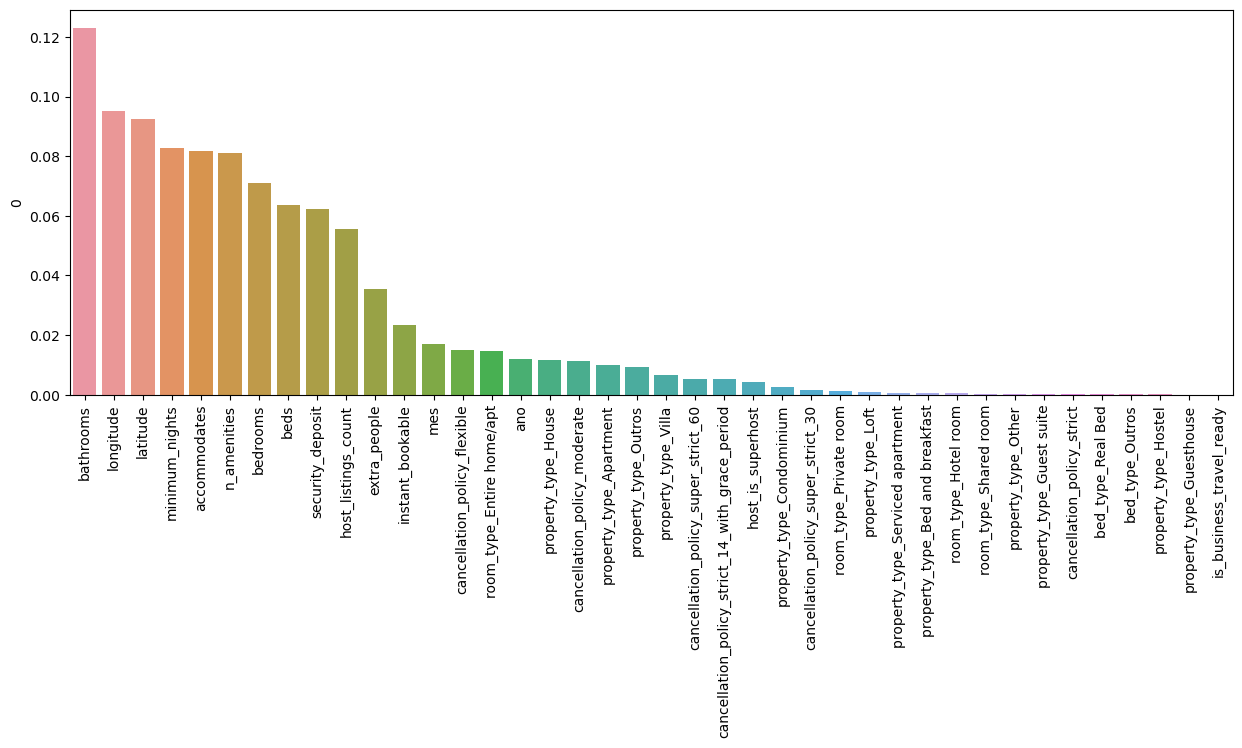

In [10]:
importancia_features = pd.DataFrame(model_et.feature_importances_, selected_features)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)
plt.show()

In [11]:
df = df.drop('is_business_travel_ready', axis=1)     # Teste sem a variavel 

y = df['price']
X = df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_et.fit(X_train_selected, y_train)

y_pred_et = model_et.predict(X_test_selected)

# Avaliando o modelo ExtraTreesRegressor
mae = mean_absolute_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)
print('Erro absoluto médio (MAE) - ExtraTreesRegressor:', mae)
print('Coeficiente de determinação (R²) - ExtraTreesRegressor:', r2_et)

Erro absoluto médio (MAE) - ExtraTreesRegressor: 29.81915669454642
Coeficiente de determinação (R²) - ExtraTreesRegressor: 0.9444771553495686


In [12]:
df1 = df.copy()

for coluna in df1:                                    # Teste sem a variavel
    if 'bed_type' in coluna:
        df1 = df1.drop(coluna, axis=1)
y = df1['price']
X = df1.drop('price', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred_et = model_et.predict(X_test_selected)

# Avaliando o modelo ExtraTreesRegressor
mae = mean_absolute_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)
print('Erro absoluto médio (MAE) - ExtraTreesRegressor:', mae)
print('Coeficiente de determinação (R²) - ExtraTreesRegressor:', r2_et)

Erro absoluto médio (MAE) - ExtraTreesRegressor: 29.81915669454642
Coeficiente de determinação (R²) - ExtraTreesRegressor: 0.9444771553495686


Os resíduos são as diferenças entre os valores reais e os valores previstos pelo modelo. Eles representam os erros ou discrepâncias entre as previsões do modelo e os dados reais.  Se os resíduos forem distribuídos aleatoriamente em torno de zero e não houver um padrão claro, isso indica que o modelo está ajustado.

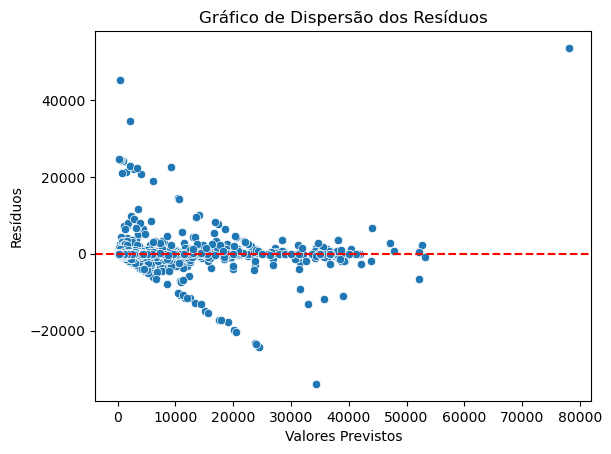

In [13]:
residuos = y_test -  y_pred_et

sns.scatterplot(x=y_pred_et, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão dos Resíduos')
plt.show()

Aparentemente o modelo nao possui um viés, tem uma boa distribuiçao, um indicativo que o modelo está ajustando bem os dados. Ainda há presença de outliers mas como foi destacado na analise anterior, o dataset contem valores discrepantes mas sao dados legitimos onde devem ser levados em consideraçao visto que se trata de valores de imoveis ou outras caracteristicas .

Nem todos os outliers devem ser tratados como erros ou removidos do conjunto de dados, especialmente se forem representantes de situações especiais que são relevantes para o problema em questão.
<br>
<br>
<br>
<br>
- Modelo importado para joblib para futuro deploy

In [14]:
X['price'] = y
X.to_csv('dadoss.csv')

In [15]:
import joblib
joblib.dump(model_et, 'modelo.joblib')

['modelo.joblib']